In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


# Run the below code to train your model

In [12]:
# Initialising the CNN
classifier = Sequential()

In [13]:
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [14]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [15]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [16]:
# Step 3 - Flattening
classifier.add(Flatten())

In [17]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 5, activation = 'sigmoid'))

In [18]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
horizontal_flip = True)

In [20]:

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory('C:\\Users\\lokeshwaran\\Downloads\\Sample-Projects-master\\Sample-Projects-master\\Keras_CNN_Classification\\Person_Classification\\Images', 
                                                 target_size = (64, 64),
                                                 batch_size = 32)

Found 55 images belonging to 5 classes.


In [26]:
test_set = test_datagen.flow_from_directory('C:\\Users\\lokeshwaran\\Downloads\\Sample-Projects-master\\Sample-Projects-master\\Keras_CNN_Classification\\Person_Classification\\Images',
                                            target_size = (64, 64),
                                            batch_size = 32
)

Found 55 images belonging to 5 classes.


In [27]:

classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,
validation_steps = 2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
8000/8000 [==============================] - 25751s 3s/step - loss: 0.0028 - acc: 0.9989 - val_loss: 1.3374e-07 - val_acc: 1.0000


In [28]:
model_json = classifier.to_json()

In [29]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [30]:
classifier.save_weights("model.h5")

Ramesh


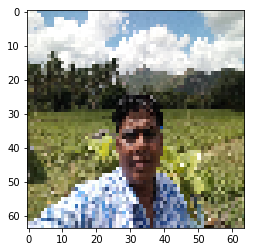

In [45]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt 
test_image = image.load_img('C:\\Users\\lokeshwaran\\Downloads\\Sample-Projects-master\\Sample-Projects-master\\Keras_CNN_Classification\\Cats_Dogs\\Ramesh17.jpg', target_size = (64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
#print(training_set.class_indices)
if result[0][0] == 1:
    print("Hemanth")
elif result[0][1] == 1:
    print("Lokesh")
elif result[0][2] ==1:
    print("Ramesh")
elif result[0][3]==1:
    print("Srinivas")
elif result[0][4]==1:
    print("Venkat")
else:
    print("Alien")

# Run the below code to load already trained model

In [42]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [43]:
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Ramesh


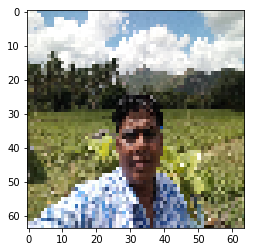

In [46]:
test_image = image.load_img('C:\\Users\\lokeshwaran\\Downloads\\Sample-Projects-master\\Sample-Projects-master\\Keras_CNN_Classification\\Cats_Dogs\\Ramesh17.jpg', target_size = (64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = loaded_model.predict(test_image)
#print(training_set.class_indices)
if result[0][0] == 1:
    print("Hemanth")
elif result[0][1] == 1:
    print("Lokesh")
elif result[0][2] ==1:
    print("Ramesh")
elif result[0][3]==1:
    print("Srinivas")
elif result[0][4]==1:
    print("Venkat")
else:
    print("Alien")